# Properties of Contours

There are several simple properties of contours which can be very useful in tasks like object detection in Computer Vision.Some of them are 

1. Centroid/Center of Mass
2. Area
3. Perimeter
4. Bounding boxes
5. Rotated bounding boxes
6. Minimum enclosing circles
7. Fitting an ellipse

## Centroid/ Center of Mass

Properties of the contours are processed on one contour at a time. 

Centroid is simply the mean of all the x,y positions along the contour of a shape. To compute the centroid, contour moments are used. A detailed discussion on the moments will be in a later post. 

The code below shows an implementation to identify centroid of shapes

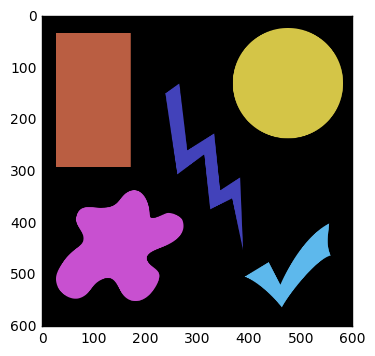

In [1]:
import cvutils
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import imutils
import numpy as np

image = cv2.imread('image/more_shapes.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#blr = cv2.GaussianBlur(image,(5,5),0)
plt.imshow(image,cmap='gray')
plt.show()

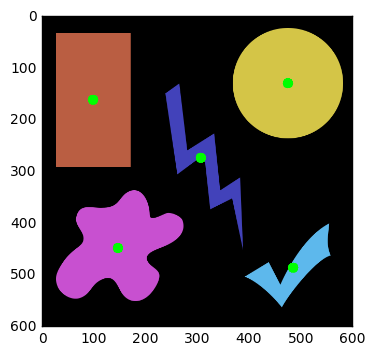

In [2]:
cnts = cv2.findContours(gray.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
clone = image.copy()

for i,c  in enumerate(cnts[1]):
    cv2.drawContours(clone,[c],-1,(0,255,0),2)
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    
    cv2.circle(image,(cX,cY),10,(0,255,0),-1)

plt.imshow(image)
plt.show()

## Area and Perimeter of a contour

Area of a contour is the number of pixels inside the contour and Perimeter is the length of the contour 
To get the contour's area and perimeter we can use **cv2.contourArea** and **cv2.arcLength** functions

Area of contour 1 : 8049.50
Perimeter of contour 1 : 577.39
Area of contour 2 : 30873.00
Perimeter of contour 2 : 893.32
Area of contour 3 : 10435.50
Perimeter of contour 3 : 1038.54
Area of contour 4 : 36751.00
Perimeter of contour 4 : 800.00
Area of contour 5 : 35702.00
Perimeter of contour 5 : 705.07


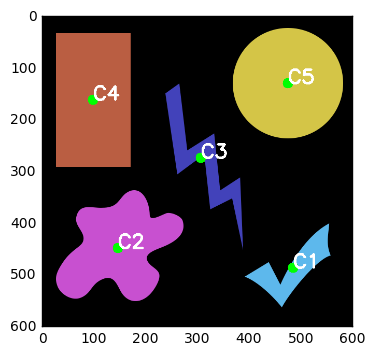

In [3]:
for i,c  in enumerate(cnts[1]):
    cv2.drawContours(clone,[c],-1,(0,255,0),2)
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    area = cv2.contourArea(c)
    perimeter = cv2.arcLength(c,True)
    
    cv2.putText(image,"C{}".format(i+1),(cX,cY),cv2.FONT_HERSHEY_SIMPLEX,
                1.25, (255, 255, 255), 4)
    print("Area of contour {:d} : {:.2f}".format(i+1,area))
    print("Perimeter of contour {:d} : {:.2f}".format(i+1,perimeter))

plt.imshow(image)
plt.show()

## Bounding Box and rotated Bounding Box

cv2.boundingRect returns a four valued tuple which contains the x, y of the left top corner and the width and height of the bounding box. 

cv2.minAreaRect returns a three value tuple, (x,y) of the left top corner, (width,height) of the box and theta, the angle of rotation.

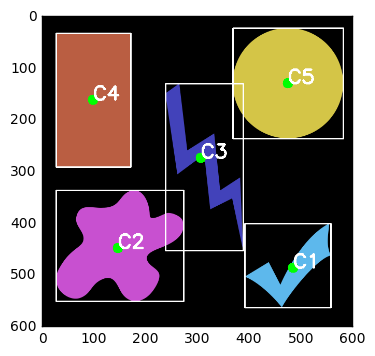

In [4]:
clone1 = image.copy()
for i,c  in enumerate(cnts[1]):
    (x,y,w,h) = cv2.boundingRect(c)
    cv2.rectangle(clone1, (x,y),(x+w,y+h), (255,255,255),2)

plt.imshow(clone1)
plt.show()

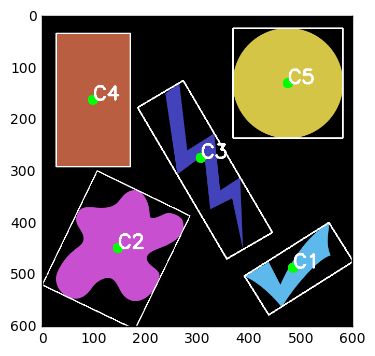

In [5]:
clone2 = image.copy()
for i,c  in enumerate(cnts[1]):
    box = cv2.minAreaRect(c)
    box = np.int0(cv2.boxPoints(box))
    
    
    cv2.drawContours(clone2,[box],-1,(255,255,255),2)

plt.imshow(clone2)
plt.show() 

## Fitting an enclosing circle to a contour

Similar to a rectangle, a minimum enclosing circle can be drawn to envolope a contour using cv2.minEnclosingCircle

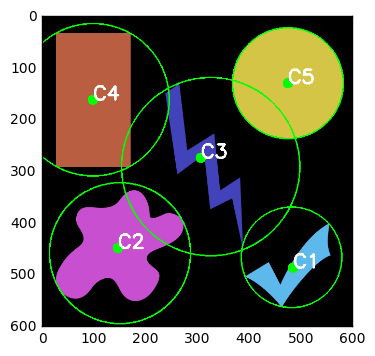

In [6]:
clone3 = image.copy()
for i,c  in enumerate(cnts[1]):
    ((x,y),radius) = cv2.minEnclosingCircle(c)
    cv2.circle(clone3,(int(x),int(y)),int(radius),(0,255,0),2)
    
plt.imshow(clone3)
plt.show()

Centroid C1 148,225
Area of C1 = 9722.0
Perimeter of C1 = 367.3624792098999
(93, 170, 111, 111)
((148.0, 225.0), 56.08039855957031)
Centroid C2 231,75
Area of C2 = 6047.0
Perimeter of C2 = 347.90663504600525
(177, 41, 110, 97)
((231.5, 74.26596069335938), 62.831703186035156)
Centroid C3 71,87
Area of C3 = 12100.0
Perimeter of C3 = 440.0
(16, 32, 111, 111)
((71.0, 87.0), 77.78184509277344)


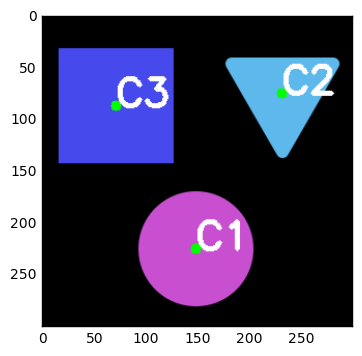

In [7]:
image2 = cv2.imread('image/shapes_example.png')
gray2 = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)
cnts2 = cv2.findContours(gray2.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
clone4 = image2.copy()

for i,c in enumerate(cnts2[1]):
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    
    cv2.circle(clone4,(cX,cY),5,(0,255,0),-1)
    cv2.putText(clone4,"C{}".format(i+1),(cX,cY),cv2.FONT_HERSHEY_SIMPLEX,
                1.25, (255, 255, 255), 4)
    print("Centroid C{} {},{}".format(i+1,cX,cY))
    print("Area of C{} = {}".format(i+1,cv2.contourArea(c)))
    print("Perimeter of C{} = {}".format(i+1,cv2.arcLength(c,True)))
    print(cv2.boundingRect(c))
    print(cv2.minEnclosingCircle(c))

plt.imshow(clone4)
plt.show()


## Convex Hull , Extent and Solidity

Given a set of X points in the Euclidean space, the convex hull is the smallest possible convex set that contains these X points. 

Solidity is defined as the area of the curve dvided by the area under the convex hull. This is a measure of the convexity of the contour

Extent is defined as the area of the curve divided by the area under the bounding box.

Centroid C1 109,251
Area of C1 = 6985.0
Perimeter of C1 = 491.82337474823
(18, 216, 197, 72)
((115.21939086914062, 251.5), 98.78197479248047)
Solidity = 0.7827646102986496
Extent = 0.4924562887760857
Centroid C2 210,149
Area of C2 = 11544.0
Perimeter of C2 = 400.33304023742676
(150, 89, 121, 121)
((210.0, 149.0), 61.09838104248047)
Solidity = 0.993801652892562
Extent = 0.7884707328734376
Centroid C3 98,44
Area of C3 = 8772.0
Perimeter of C3 = 446.0
(12, 19, 173, 52)
((98.0, 44.5), 89.70098876953125)
Solidity = 1.0
Extent = 0.9751000444642063


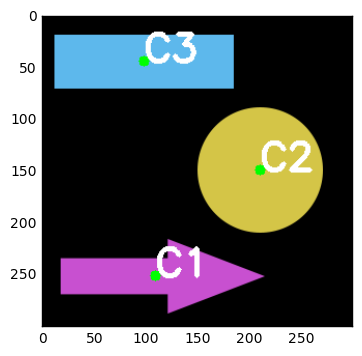

In [8]:
image2 = cv2.imread('image/more_shapes_example.png')
gray2 = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)
cnts2 = cv2.findContours(gray2.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

clone4 = image2.copy()

for i,c in enumerate(cnts2[1]):
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    
    cv2.circle(clone4,(cX,cY),5,(0,255,0),-1)
    cv2.putText(clone4,"C{}".format(i+1),(cX,cY),cv2.FONT_HERSHEY_SIMPLEX,
                1.25, (255, 255, 255), 4)
    print("Centroid C{} {},{}".format(i+1,cX,cY))
    print("Area of C{} = {}".format(i+1,cv2.contourArea(c)))
    print("Perimeter of C{} = {}".format(i+1,cv2.arcLength(c,True)))
    print(cv2.boundingRect(c))
    print(cv2.minEnclosingCircle(c))
    hull = cv2.convexHull(c)
    hull_area = cv2.contourArea(hull)
    
    solidity = cv2.contourArea(c)/hull_area
    print("Solidity = {}".format(solidity))
    
    box = cv2.boundingRect(c)
    box_area = box[2]*box[3]
    print("Extent = {}".format(cv2.contourArea(c)/box_area))
plt.imshow(clone4)
plt.show()

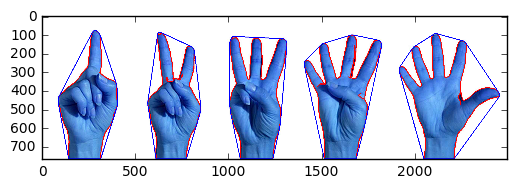

In [36]:
image5 = cv2.imread('image/five-finger-voting.jpg')
#gray5 = cv2.cvtColor(image5,cv2.COLOR_BGR2GRAY)

accumEdged = np.zeros(image5.shape[:2], dtype="uint8")
for chan in cv2.split(image5):
    # blur the channel, extract edges from it, and accumulate the set
    # of edges for the image
    chan = cv2.medianBlur(chan, 11)
    edged = cv2.Canny(chan, 50, 200)
    accumEdged = cv2.bitwise_or(accumEdged, edged)
    
cnts5 = cv2.findContours(accumEdged.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

sorted_contours = sorted(cnts5[1], key=cv2.contourArea, reverse=True)[:5]
clone5 = image5.copy()

for i,c in enumerate(sorted_contours):
    cv2.drawContours(clone5,[c],-1,(255,0,0),3)
    cv2.drawContours(clone5,[cv2.convexHull(c)],-1,(0,0,255),3)


plt.imshow(clone5)
plt.show()